Student Details

Name: Cormac Lavery

ID: 16139658

All necessary imports are provided. Please do not add further imports.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

Below is the exact same data you used for the regression in E-tivity 3, but this time you know exactly what function generated the data

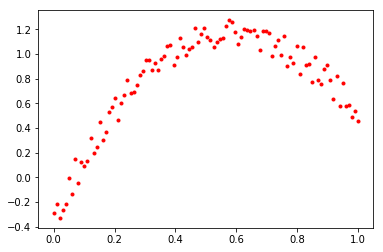

In [2]:
def target(X):
    #return: 0.5X^5-0.5X^3-4.25X^2+5.125X-0.4375
    return 0.5*((X-.5)-10*(X-.5)**2-(X-.5)**3+X**5)+1

points = 100
X = np.linspace(0, 1, points) # 100 values between 0 and 100
noise=np.random.random(points)/4
y_nf = target(X) #noise free target
y = y_nf+noise #noisy target

plt.plot(X,y,'r.')
plt.show()

Below is an implementation of linear regression with regularization

In [3]:
def weights_reg(X,y,l):
    n = len(X)
    m=X.T.dot(X)
    return np.linalg.inv(m+l*np.identity(m.shape[0])).dot(X.T).dot(y)

In [4]:
def lin_reg(w,X):
    # Calculation of outputs given weights and data (X). Note that X needs to contain the bias of 1. 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

In [5]:
def calc_error(w,X,y):
    # Calculate the error as the mean squared error
    pred = lin_reg(w,X)
    return math.sqrt((pred-np.array(y)).dot(pred-np.array(y))/len(X))

To create higher order features:

In [6]:
def transPoly(X, power):
    # Extend the data in X with a bias (1) and powers of the feature up to 'power'
    ones = np.ones((X.shape[0],1))
    extra=[]
    for x in X:
        row=[]
        for p in range(2,power+1):
            row.append(x**p)
        extra.append(row)
    return np.concatenate((ones, X.reshape(len(X),1),np.array(extra)),1)

Iterate over lambda, train the model and calculate Eout. Plot the latter versus lambda to see how much regularization is required.

In [7]:
ein=[]
eout=[]
weights=[]
lambdas = list(np.linspace(0,1,1000))
X_trans = transPoly(X,50)
# random_state fixed to get reproducible (and 'good'! :-)) results
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.9, random_state =5)
for l in lambdas:    
    w = weights_reg(X_train,y_train,l)
    ein.append(calc_error(w,X_train,y_train))
    eout.append(calc_error(w,X_test,y_test))
    weights.append(w)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [48]:
best_lambda = lambdas[eout.index(min(eout))]
worst_lambda = lambdas[eout.index(max(eout))]
difference_best_worst = max(eout) - min(eout)
print(best_lambda)
print(worst_lambda)
print(difference_best_worst)

0.001001001001001001
0.0
1.4099782786634574


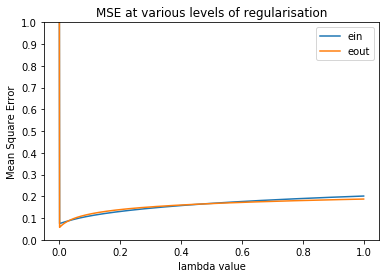

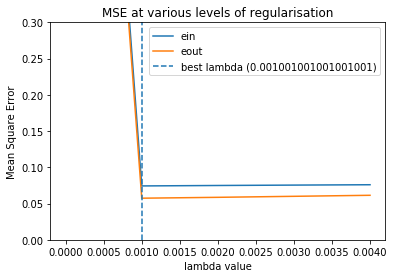

In [50]:
plt.plot(lambdas, ein, label="ein")
plt.plot(lambdas, eout, label="eout")
plt.ylim([0,1])
plt.locator_params(axis='y', nbins=10)
plt.title('MSE at various levels of regularisation')
plt.xlabel("lambda value")
plt.ylabel("Mean Square Error")
plt.legend(loc="upper right")
plt.show()
plt.plot(lambdas[:5], ein[:5], label="ein")
plt.plot(lambdas[:5], eout[:5], label="eout")
plt.ylim([0,.3])
plt.locator_params(axis='y', nbins=10)
plt.axvline(x=best_lambda, linestyle='dashed', label='best lambda ({})'.format(best_lambda))
plt.yscale
plt.title('MSE at various levels of regularisation')
plt.xlabel("lambda value")
plt.ylabel("Mean Square Error")
plt.legend(loc="upper right")
plt.show()

From the above graphs we can ascertain that a lambda of 0.001 results in the smallest error for eout. The difference between this and no regularisation is ~1.4. Thus we can see that regularisation results in a drastic improvement in model performance.

We will now consider the case of no regularisation, our optimum solution, and an overfitted example (i.e. lambdas: 0, 0.001, and 1)

In [62]:
over_w, optimum_w, under_w = weights[0], weights[eout.index(min(eout))], weights[-1]
print(optimum_w)

[-8.27337914e+00  3.71192124e+02 -4.52530800e+03  3.32833376e+04
 -2.32946288e+05  1.44558251e+06 -6.49063308e+06  2.00505477e+07
 -4.31393037e+07  6.59375970e+07 -7.28288251e+07  5.90020240e+07
 -3.52921510e+07  1.47124308e+07 -2.04861179e+06 -3.90496386e+06
  4.92414546e+06 -2.48926390e+06 -3.52877112e+05  1.19696081e+06
 -6.41129722e+05  2.77107373e+05 -5.43143295e+05  5.10656185e+05
 -3.22040182e+05  3.51966544e+05 -1.59094952e+04  9.98090747e+03
  6.72896306e+04 -4.82621404e+05  1.68108879e+05 -2.62386898e+05
  4.69410336e+05  1.77104373e+05  1.04743950e+05 -4.66215617e+05
  3.25508424e+04 -3.91285918e+05  2.08891658e+05 -9.50399799e+04
  6.03536197e+05 -5.25929819e+04  8.26016177e+04 -7.50865755e+04
 -6.39115401e+03 -4.48289428e+05  1.94934176e+05 -5.48277280e+05
  2.20710217e+05  9.29005229e+05 -5.77019969e+05]


[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-8.35694862e-02  3.74941539e+00 -4.57101818e+01 ...  2.22939613e+03
   9.38389120e+03 -5.82848453e+03]
 [-1.67138972e-01  7.49883078e+00 -9.14203636e+01 ...  4.45879227e+03
   1.87677824e+04 -1.16569691e+04]
 ...
 [-8.10624016e+00  3.63693293e+02 -4.43388763e+03 ...  2.16251425e+05
   9.10237447e+05 -5.65362999e+05]
 [-8.18980965e+00  3.67442708e+02 -4.47959782e+03 ...  2.18480821e+05
   9.19621338e+05 -5.71191484e+05]
 [-8.27337914e+00  3.71192124e+02 -4.52530800e+03 ...  2.20710217e+05
   9.29005229e+05 -5.77019969e+05]]


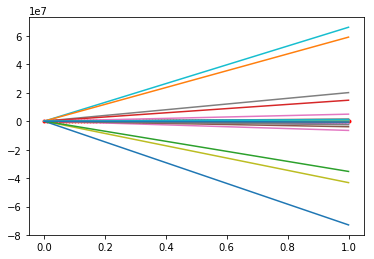

In [61]:
over_p = lin_reg(over_w, X)
print(over_p)
optimum_p = lin_reg(optimum_w, X)
under_p = lin_reg(under_w, X)

plt.plot(X,y,'r.')
plt.plot(X, over_p)
plt.show()